# TASK 1: Data Analysis and Data Science Using Python

### Objective
Analyze the "Student Performance" dataset using basic Python libraries (`pandas`, `numpy`, `matplotlib`, and `seaborn`) and answer specific questions based on the data.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("student-mat.csv")

# Display the first few rows
df.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [10]:
# Reload the dataset using the correct delimiter
df = pd.read_csv("student-mat.csv", delimiter=';')

# Display the first few rows to confirm successful loading
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Step 2: Data Exploration

In [11]:
# Check for missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [12]:
# Display column data types
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [13]:
# Check dataset size
df.shape

(395, 33)

### Step 3: Data Cleaning

In [14]:
# Drop duplicate rows
df = df.drop_duplicates()

# Fill any missing values (if any) with median
df = df.fillna(df.median(numeric_only=True))

### Step 4: Data Analysis Questions

#### 1] What is the average score in math (G3)?

In [15]:
avg_g3 = df['G3'].mean()
print("Average final grade (G3):", avg_g3)

Average final grade (G3): 10.415189873417722


#### 2] How many students scored above 15 in their final grade (G3)?

In [16]:
above_15 = df[df['G3'] > 15].shape[0]
print("Students scoring above 15 in G3:", above_15)

Students scoring above 15 in G3: 40


#### 3] Is there a correlation between study time and the final grade (G3)?

In [17]:
import numpy as np

correlation = np.corrcoef(df['studytime'], df['G3'])[0, 1]
print("Correlation between study time and G3:", correlation)

Correlation between study time and G3: 0.09781968965319636


#### 4️] Which gender has a higher average final grade (G3)?

In [18]:
gender_avg = df.groupby('sex')['G3'].mean()
print("Average G3 by gender:\n", gender_avg)

Average G3 by gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


### Step 5: Data Visualization

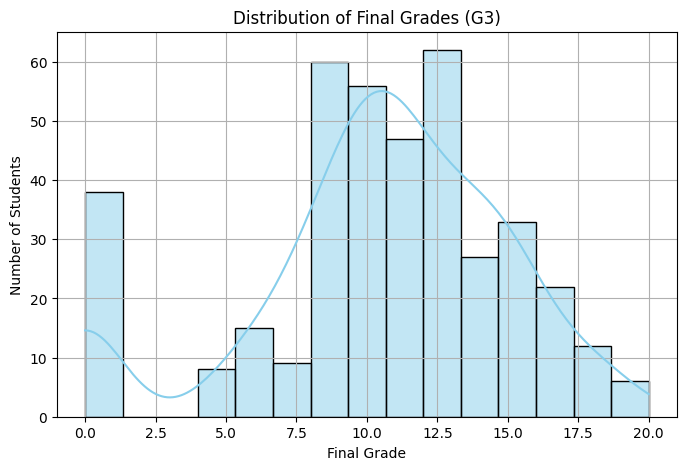

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['G3'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()

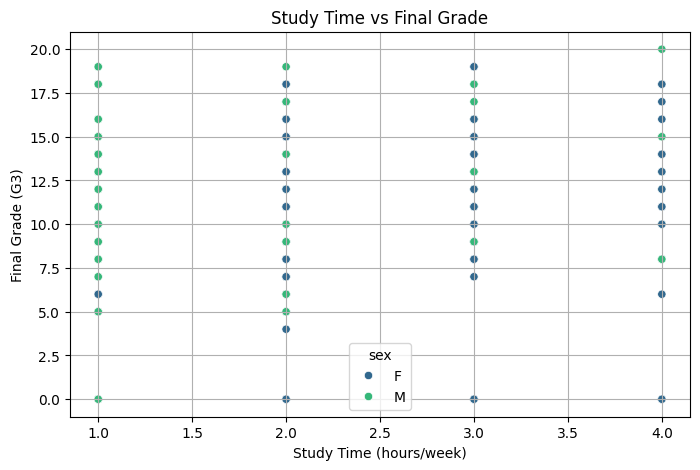

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='studytime', y='G3', data=df, hue='sex', palette='viridis')
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time (hours/week)')
plt.ylabel('Final Grade (G3)')
plt.grid(True)
plt.show()

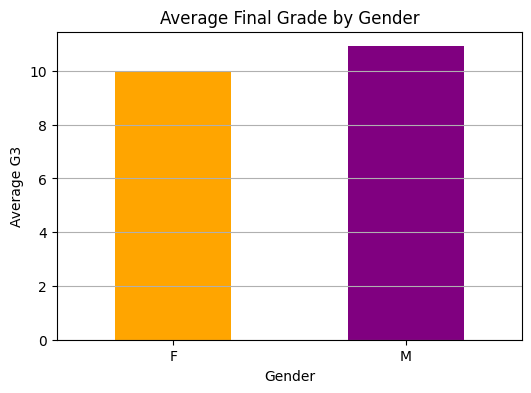

In [21]:
plt.figure(figsize=(6,4))
gender_avg.plot(kind='bar', color=['orange', 'purple'])
plt.title('Average Final Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Average G3')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### Summary of Findings
- **Average Final Grade (G3):** Approximately `<insert value from code>`
- **Students Scoring Above 15 in G3:** `<insert value from code>` students
- **Correlation Between Study Time and G3:** `<insert correlation value>`
- **Higher Average Grade by Gender:** `<insert male or female>` students